In [1]:
%pylab inline
rcParams['figure.figsize'] = (12, 10)
from chest import Chest
import scipy.stats as stats
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Two ball moving case
two_ball = Chest(path='brownian-nonstationary.chest')

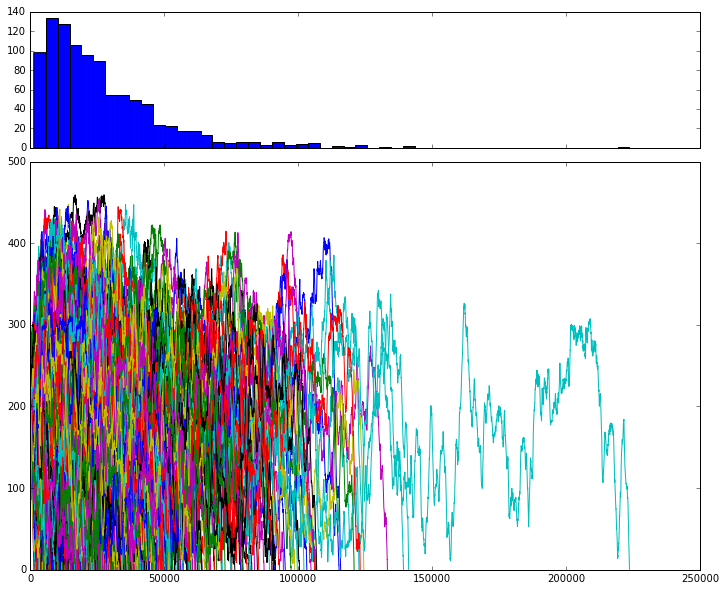

In [22]:
fig, (ax1, ax2) = subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'height_ratios': (1, 3)})

radius = 50
ns = []
for seed, (n, d) in two_ball.items():
    ns.append(n)
    ax2.plot(d - 2*radius, label='{:d}'.format(seed))
    
ax1.hist(ns, 50)
savefig('two-ball-hist.png')

In [3]:
# Two ball moving case
one_ball = Chest(path='brownian-stationary.chest')

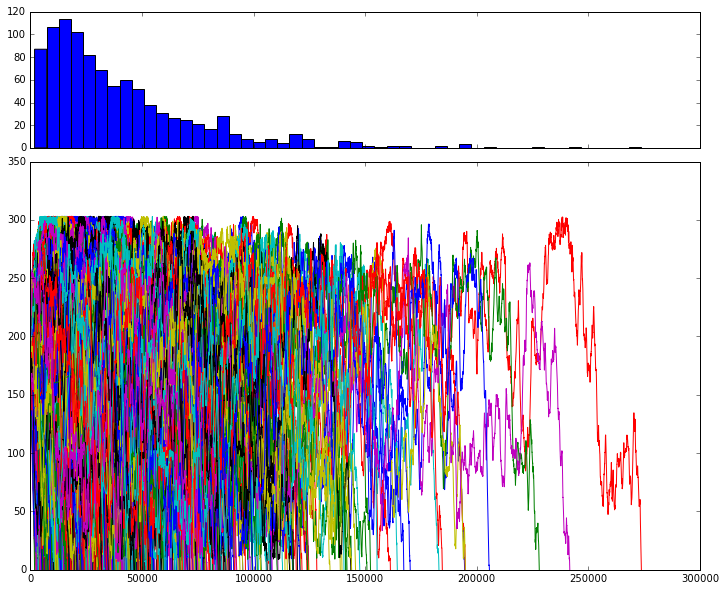

In [24]:
fig, (ax1, ax2) = subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'height_ratios': (1, 3)})

radius = 50
ns = []
for seed, (n, d) in one_ball.items():
    ns.append(n)
    ax2.plot(d - 2*radius, label='{:d}'.format(seed))
    
ax1.hist(ns, 50)
savefig('one-ball-hist.png')

## Fit the histogram to Maxwell-Boltzmann distribution

In [21]:
def ecdf(data):
    '''Calculate the emperical CDF function
    '''
    xs = np.sort(data)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

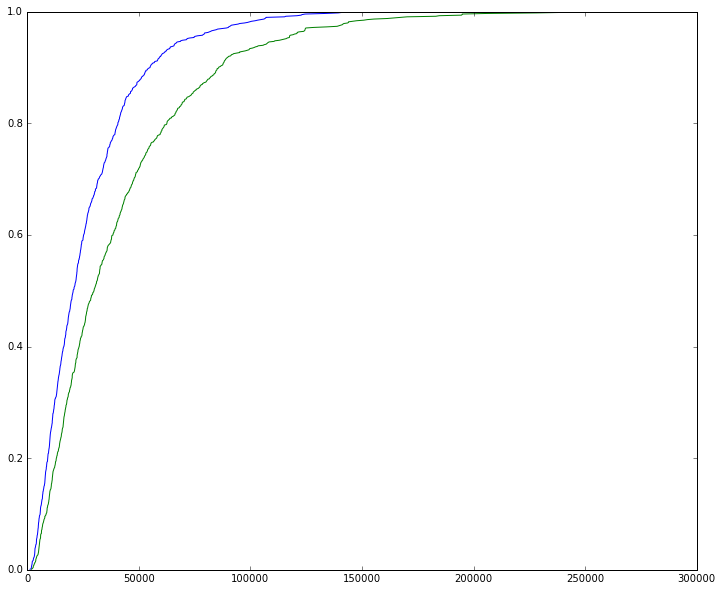

In [22]:
two_ball_ns = np.array([n for k, (n, d) in two_ball.items()], dtype=float)
one_ball_ns = np.array([n for k, (n, d) in one_ball.items()], dtype=float)

plot(*ecdf(two_ball_ns))
plot(*ecdf(one_ball_ns))

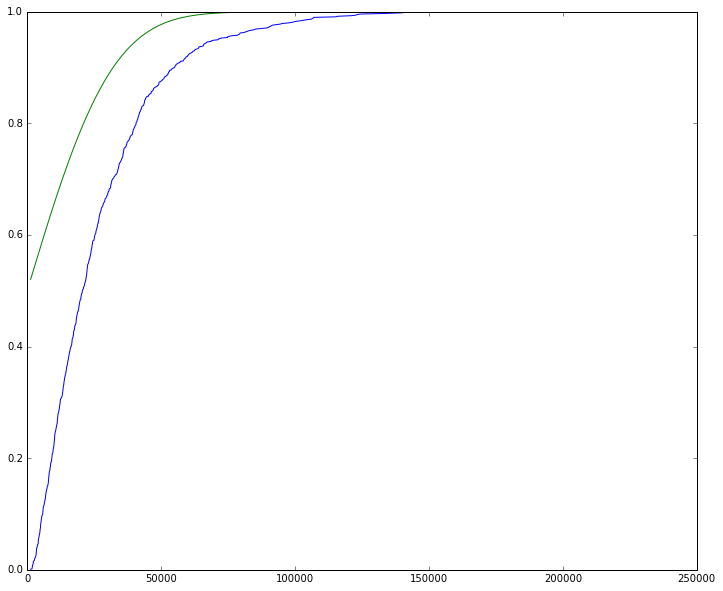

In [23]:
xs, ys = ecdf(two_ball_ns)
plot(xs, ys)

plot(xs, stats.norm.cdf(xs, scale=25000))

In [31]:
def dist(p, x):
    return stats.norm.cdf(x, loc=p[0], scale=p[1])

def residuals(p, x, data):
    return np.linalg.norm(data - dist(p, x), ord=2)

two_ball_x, two_ball_ecdf = ecdf(two_ball_ns)
one_ball_x, one_ball_ecdf = ecdf(one_ball_ns)

p0_2 = (0, 1000)
res = minimize(residuals, p0_2, args=(two_ball_x, two_ball_ecdf), method='Nelder-Mead')
p_2 = res['x']

p0_1 = (0, 1000)
res = minimize(residuals, p0_2, args=(one_ball_x, one_ball_ecdf), method='Nelder-Mead')
p_1 = res['x']

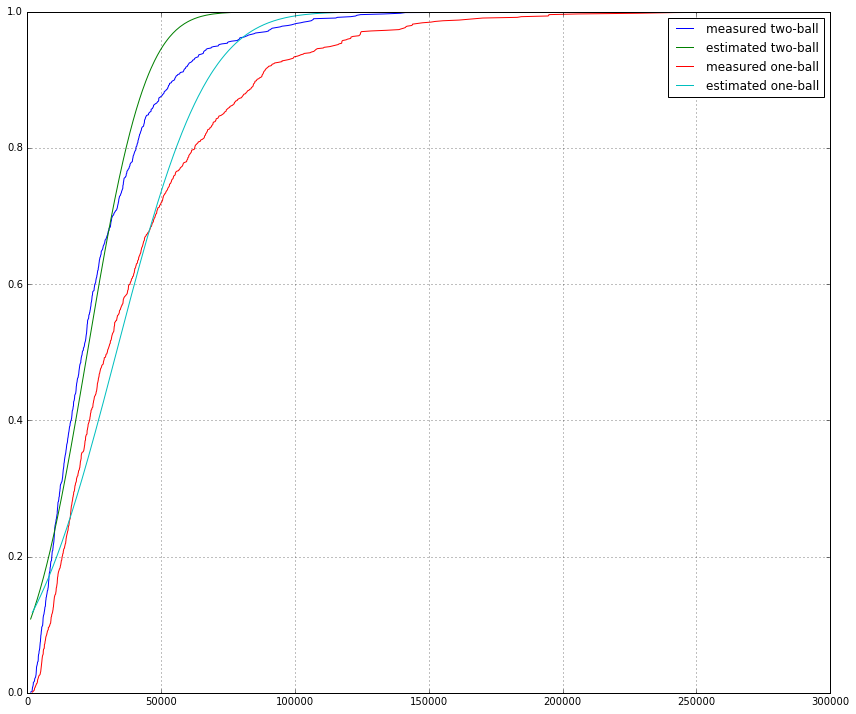

In [34]:

plot(two_ball_x, two_ball_ecdf, label='measured two-ball')
plot(two_ball_x, dist(p_2, two_ball_x), label='estimated two-ball')

plot(one_ball_x, one_ball_ecdf, label='measured one-ball')
plot(one_ball_x, dist(p_1, one_ball_x), label='estimated one-ball')
#plot(two_ball_x, dist(p0, two_ball_x), label='starting guess')
grid()
legend(loc='best')
tight_layout()

savefig('fit-cdf.png')